In [2]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, RandomHamiltonian, IsingHamiltonian

In [4]:
#Initializing starting values 
visible_size = 5
hidden = 12
steps = 2000

seed = 45

#Finding true ground state energy and displaying it
np.random.seed(seed)


In [5]:
H = RandomHamiltonian(n = visible_size)
#print(f"hamiltonian: {H}")
rbm = RBM(visible_size=visible_size, hidden_size=hidden, hamiltonian=H, walker_steps=0)

eig, state = np.linalg.eigh(H)

E_truth = np.min(eig)
e_truth_index = np.argmin(eig)
#print(f"Eig index: {e_truth_index}")
gstate = state[:,e_truth_index]
#print(f"g state: {gstate}")

accuracy_list = []
state_acc_list = []
steps_list=[]

for i in range(1,20):
    
    steps = 10*i
    steps_list.append(steps)
    energy_list = rbm.train(iterations=steps, lr=0.01, print_energy=False)
    #print(rbm.train.run_time)
    
    print(f"Ground state energy found: {energy_list[-1]}")
    print(f"True energy ground state: {E_truth}")
    accuracy = (E_truth-energy_list[-1]-E_truth)/E_truth
    print(f"Accuracy: {accuracy}") # relative error
    
    state_error = 1- (np.abs(gstate.T.conj() @ rbm.wave_function()))
    print(f"RBM state error: {state_error}")
    
    accuracy_list.append(accuracy)
    state_acc_list.append(state_error)

func:train args:[(<src.nqs.RBM object at 0x00000272CD03C220>,), {'iterations': 10, 'lr': 0.01, 'print_energy': False}] took: 0.027527809143066406 sec
Ground state energy found: -3.402192650447657
True energy ground state: -20.564525040156713
Accuracy: 0.8345601153537884
RBM state error: [0.86971582]
func:train args:[(<src.nqs.RBM object at 0x00000272CD03C220>,), {'iterations': 20, 'lr': 0.01, 'print_energy': False}] took: 0.05151772499084473 sec
Ground state energy found: -6.834236933287565
True energy ground state: -20.564525040156713
Accuracy: 0.6676686225457564
RBM state error: [0.71658594]
func:train args:[(<src.nqs.RBM object at 0x00000272CD03C220>,), {'iterations': 30, 'lr': 0.01, 'print_energy': False}] took: 0.07100033760070801 sec
Ground state energy found: -11.35012613616161
True energy ground state: -20.564525040156713
Accuracy: 0.44807253685664916
RBM state error: [0.64641466]
func:train args:[(<src.nqs.RBM object at 0x00000272CD03C220>,), {'iterations': 40, 'lr': 0.01, 'pr

<IPython.core.display.Javascript object>


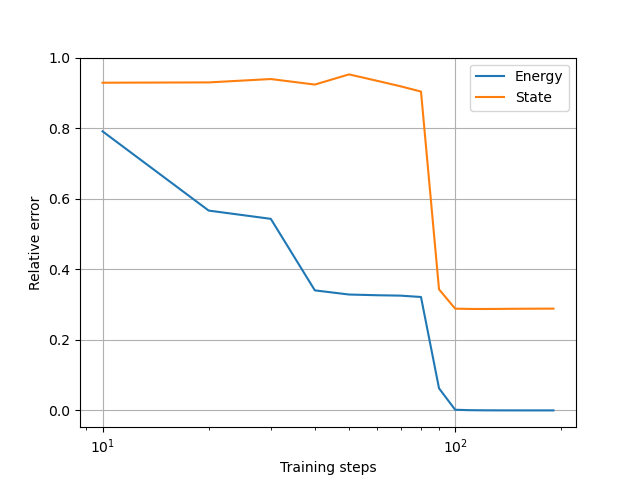

In [19]:
plt.figure(2)
plt.semilogx(steps_list, accuracy_list)
plt.semilogx(steps_list,state_acc_list)
plt.legend(["Energy", "State"])
plt.ylabel("Relative error")
plt.xlabel("Training steps")
plt.grid()



In [9]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d;%H%M'

path = f"{desktop_path}\\{datetime.now().strftime(date_format)}-random_state_acc"
os.makedirs(path)
plt.savefig(f"{path}/random_state_acc.pdf")

In [10]:
H =IsingHamiltonian(n = visible_size)
#print(f"hamiltonian: {H}")
rbm = RBM(visible_size=visible_size, hidden_size=hidden, hamiltonian=H, walker_steps=0)

eig, state = np.linalg.eigh(H)

E_truth = np.min(eig)
e_truth_index = np.argmin(eig)
#print(f"Eig index: {e_truth_index}")
gstate = state[:,e_truth_index]
#print(f"g state: {gstate}")

accuracy_list = []
state_acc_list = []
steps_list=[]

for i in range(1,20):
    
    steps = 10*i
    steps_list.append(steps)
    energy_list = rbm.train(iterations=steps, lr=0.01, print_energy=False)
    #print(rbm.train.run_time)
    
    print(f"Ground state energy found: {energy_list[-1]}")
    print(f"True energy ground state: {E_truth}")
    accuracy = np.abs((E_truth-energy_list[-1])/abs(E_truth))
    print(f"Accuracy: {accuracy}") # relative error
    
    state_error = 1- (np.abs(gstate.T.conj() @ rbm.wave_function()))
    print(f"RBM state error: {state_error}")
    
    accuracy_list.append(accuracy)
    state_acc_list.append(state_error)

func:train args:[(<src.nqs.RBM object at 0x00000272D1367AF0>,), {'iterations': 10, 'lr': 0.01, 'print_energy': False}] took: 0.022998571395874023 sec
Ground state energy found: -0.6224207859295542
True energy ground state: -2.983033565572636
Accuracy: 0.7913463686386406
RBM state error: [0.92921476]
func:train args:[(<src.nqs.RBM object at 0x00000272D1367AF0>,), {'iterations': 20, 'lr': 0.01, 'print_energy': False}] took: 0.05302309989929199 sec
Ground state energy found: -1.2928598297263991
True energy ground state: -2.983033565572636
Accuracy: 0.5665956143949
RBM state error: [0.93007833]
func:train args:[(<src.nqs.RBM object at 0x00000272D1367AF0>,), {'iterations': 30, 'lr': 0.01, 'print_energy': False}] took: 0.0820169448852539 sec
Ground state energy found: -1.36266671887148
True energy ground state: -2.983033565572636
Accuracy: 0.5431943057570334
RBM state error: [0.93963763]
func:train args:[(<src.nqs.RBM object at 0x00000272D1367AF0>,), {'iterations': 40, 'lr': 0.01, 'print_ene

<IPython.core.display.Javascript object>


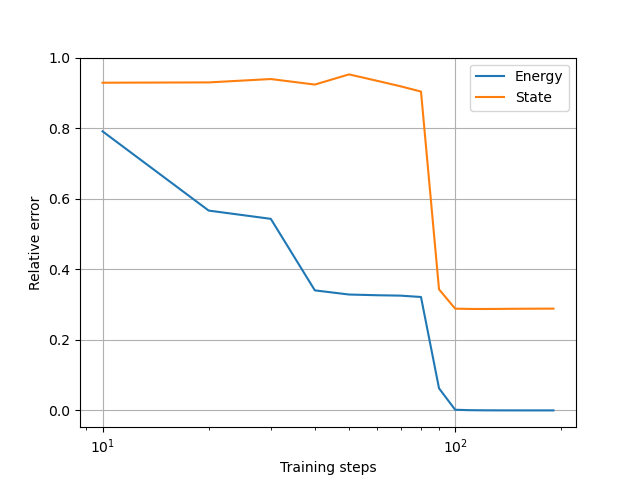

In [20]:
plt.figure(1)
plt.semilogx(steps_list, accuracy_list)
plt.semilogx(steps_list,state_acc_list)
plt.legend(["Energy", "State"])
plt.ylabel("Relative error")
plt.xlabel("Training steps")
plt.grid()

In [21]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d;%H%M'

path = f"{desktop_path}\\{datetime.now().strftime(date_format)}-state_acc"
os.makedirs(path)
plt.savefig(f"{path}/ising_state_acc.pdf")

In [31]:
print(f"RBM wave function: \n{rbm.wave_function()}")
print(f"True ground state: \n{gstate}")
print(gstate.shape)
print(f"RBM state error: {1- (np.abs(gstate.T.conj() @ rbm.wave_function()))}")


RBM wave function: 
[[ 0.03669625-0.03894899j]
 [-0.06667265+0.01166058j]
 [ 0.14045843+0.03361143j]
 [ 0.06065757+0.009463j  ]
 [-0.04121764+0.11512942j]
 [ 0.33384786-0.12772555j]
 [-0.04543942+0.02076759j]
 [ 0.00267687-0.01600608j]
 [-0.04882598+0.07888398j]
 [ 0.15587351+0.0890875j ]
 [ 0.00913108+0.13230918j]
 [ 0.00685593+0.18921274j]
 [ 0.0405238 +0.0377072j ]
 [ 0.04046048+0.04433384j]
 [ 0.07764864+0.00206243j]
 [-0.07767289+0.18417004j]
 [ 0.06155921+0.07528994j]
 [-0.01948854+0.03030713j]
 [-0.0203244 -0.07597671j]
 [ 0.00953736-0.05238002j]
 [ 0.05583308-0.09973772j]
 [-0.1404911 +0.05461797j]
 [ 0.01440142-0.0256324j ]
 [-0.03278473+0.09043076j]
 [ 0.07348405+0.0707956j ]
 [ 0.02691146-0.01826019j]
 [ 0.04765492-0.13137553j]
 [ 0.09361947+0.02224778j]
 [-0.00398115-0.09659543j]
 [-0.02324182-0.07245914j]
 [-0.0134901 +0.04515891j]
 [ 0.20671966-0.10221043j]
 [-0.03154824+0.04407339j]
 [ 0.15519708+0.13615975j]
 [ 0.01475684-0.0539976j ]
 [-0.06852338-0.0889006j ]
 [ 0.067